# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [ ]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression


import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](https://drive.google.com/uc?id=1Y2mWCTA9CyYTCasJZKAOvLvtjYz6LG3U)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# **Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
boston.data.shape

(506, 13)

In [ ]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [ ]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [ ]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [ ]:
print(boston.target.shape)

(506,)


In [ ]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
bos.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [ ]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

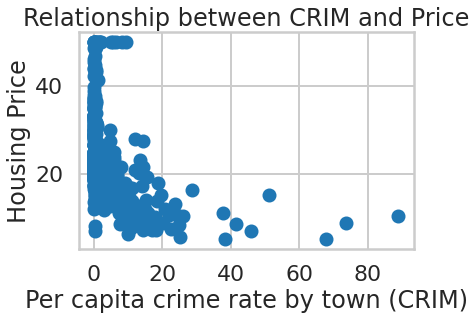

In [ ]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")



## Part 2 Checkup Exercise Set I




### <p><b>Question 1</b> 

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>

**Answer:** From the plot above, we can see that:

- Three quick observations that are pretty interesting: (i) there is a big cluster of data points in the range $[0, 20]$ of x-axis and few data points outside of this range meaning that crime rates mostly up to 20% and quite a few larger than 20%; (ii) there is a long vertical line around $x=0$ meaning that house prices (y-axis) are in a big range around $x=0$ (i.e., almost no or very little crime); (iii) there is a horizontal line around $y=50$ for x in the range $[0,10]$ meaning that even crime rate up to 10%, house prices are still pretty high/constant. 

- Overall, it seems that housing price and crime rate has a negative correlation. Namely, housing price seems to decrease with an increasing of crime rate. This correlation seems nonlinear (i.e., not a straight line). In fact, it looks like a decreasing exponential function of housing price versus increasing crime rate. 

- Regarding outliers, let's compute them to figure out. 

In [ ]:
# your turn: describe relationship
# outliers for house price
hp_up  = bos['PRICE'].mean() + 3 * bos['PRICE'].std()
hp_low = bos['PRICE'].mean() - 3 * bos['PRICE'].std()
print('Range of house price (not consider outliers): [' + str(hp_low) +', '+str(hp_up) +']' )
print('Range of house price (consider outliers): [' + \
      str(min(bos['PRICE'])) +', '+str(max(bos['PRICE'])) +']' )

Range of house price (not consider outliers): [-5.058505938028777, 50.124118586250134]
Range of house price (consider outliers): [5.0, 50.0]


In [ ]:
# outliers for crime rate
crime_up  = bos['CRIM'].mean() + 3 * bos['CRIM'].std()
crime_low = bos['CRIM'].mean() - 3 * bos['CRIM'].std()
print('Range of crime rate (not consider outliers): [' + str(crime_low) +', '+str(crime_up) +']' )
print('Range of crime rate (consider outliers): [' + \
      str(min(bos['CRIM'])) +', '+str(max(bos['CRIM'])) +']' )

Range of crime rate (not consider outliers): [-22.19111175868521, 29.41815887330972]
Range of crime rate (consider outliers): [0.00632, 88.9762]


In [ ]:
## try to plot a linear regression fit to current plot
y = (bos.PRICE).values.reshape(-1,1)
x_crime = (bos.CRIM).values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x_crime, y)

LinearRegression()

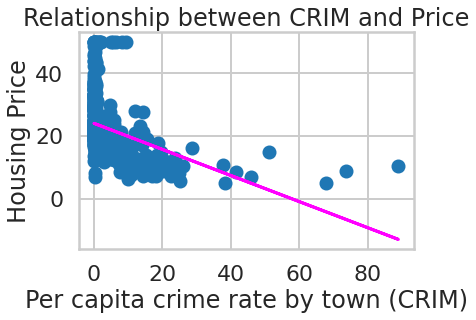

The coefficient and intercpet of the relation are: [[-0.41519028]] [24.03310617]


In [ ]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.plot(bos.CRIM, lm.predict(x_crime), color='magenta', linewidth=3)
plt.show()

print ('The coefficient and intercpet of the relation are:', lm.coef_, lm.intercept_)


###  **Question 2:**

Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>


#### RM vs PRICE

Text(0.5, 1.0, 'Relationship between RM and Price')

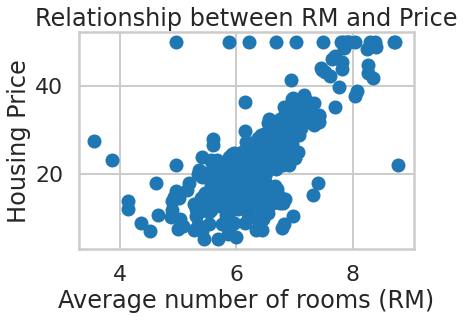

In [ ]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")


**Observation:** From the plot above, we see that there is a clear positive correlation between RM and PRICE. The relation is quite linear implies that PRICE increases with increasing RM. 

Let's fit these data points with a Linear Regression model.

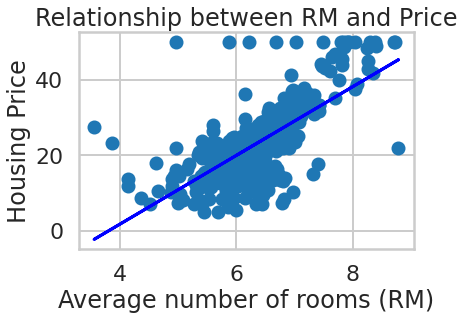

In [ ]:
## try to plot a linear regression fit to current plot
y = (bos.PRICE).values.reshape(-1,1)
x_room = (bos.RM).values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x_room, y)

plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.plot(bos.RM, lm.predict(x_room), color='blue', linewidth=3)
plt.show()

#### PTRATIO vs PRICE

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

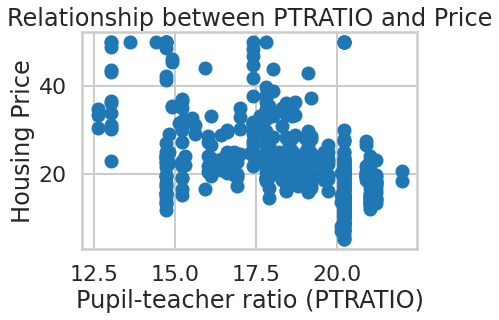

In [ ]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

**Observation**: It is pretty hard to see the overall trend from the above plot. However, we can regconize a light negative correlation between PTRATIO and PRICE. Namely, PRICE decreases with an increasing of PTRATIO. 

Again, let's try to fit a Linear Regression model to these data points to verify this observation.

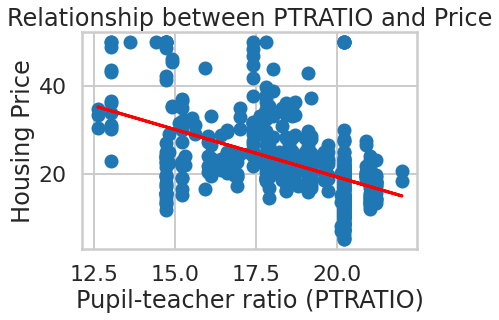

In [ ]:
## try to plot a linear regression fit to current plot
y = (bos.PRICE).values.reshape(-1,1)
x_ptratio = (bos.PTRATIO).values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x_ptratio, y)

plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.plot(bos.PTRATIO, lm.predict(x_ptratio), color='red', linewidth=3)
plt.show()


### **Question 3:**

What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

**Answer:** For this question, we can use a 2D heat map that shows/visualizes the correlation of all features versus PRICE. 


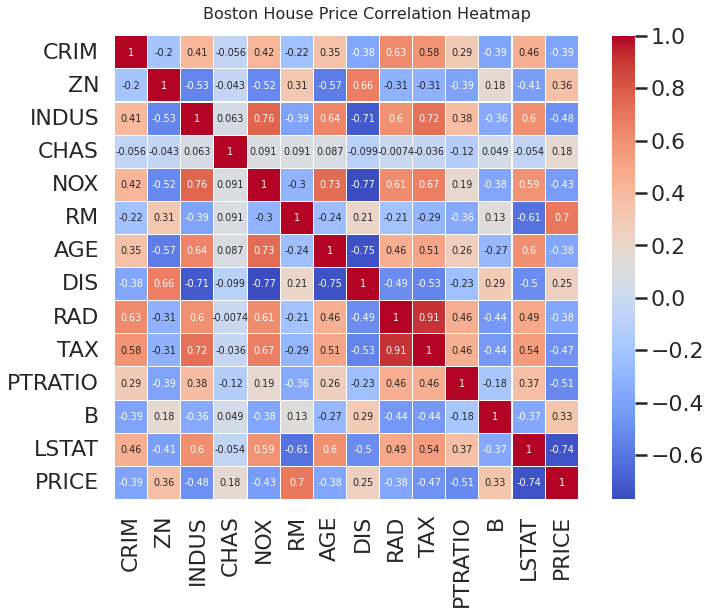

In [ ]:
# your turn: create some other scatter plots
f, ax = plt.subplots(figsize=(12, 8))
corr = bos.corr()
hm = sns.heatmap(corr, vmin=corr.values.min(), vmax=1, square=True, cmap="coolwarm", 
        linewidths=0.1, annot=True, annot_kws={"size": 36 / np.sqrt(len(corr))} )
f.subplots_adjust(top=0.93)
t= f.suptitle('Boston House Price Correlation Heatmap', 
              fontsize=16)

**Observation**: From the last row (or column) of the matrix above, we can clearly see that: 

- The ZN (0.36), CHAS (0.18), RM (0.7), DIS (0.25) and B (0.33) have positive correlation with PRICE. Namely, PRICE increases with the increases of these features. 

- On the other hand, the features CRIM (-0.39), INDUS (-0.48), NOX (-0.43), AGE (-0.38), RAD (-0.38), TAX (-0.47), PTRATIO (-0.51) and LSTAT (-0.74) have negative correlation with PRICE. 

- Overall, the above correlations of features versus PRICE are reasonable, i.e., these correlations align with reality observations. 

- One small surprise: DIS has a light positive correlation (0.25) with PRICE. In reality, we generally see that house prices increase with decreasing distances to working places. 

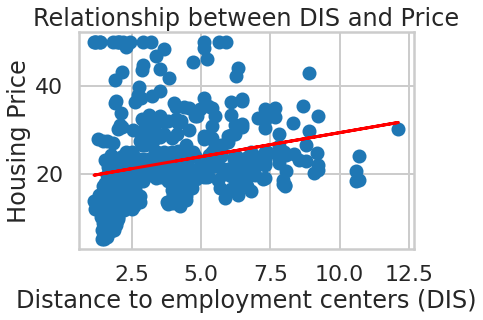

In [ ]:
## check DIS vs PRICE
y = (bos.PRICE).values.reshape(-1,1)
x_dis = (bos.DIS).values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x_dis, y)

plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Distance to employment centers (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")
plt.plot(bos.DIS, lm.predict(x_dis), color='red', linewidth=3)
plt.show()


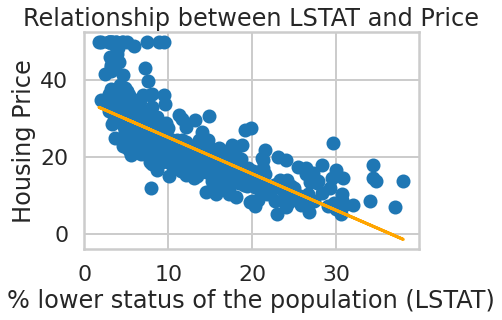

In [ ]:
## check LSTAT vs PRICE
y = (bos.PRICE).values.reshape(-1,1)
x_LSTAT = (bos.LSTAT).values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x_LSTAT, y)

plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")
plt.plot(bos.LSTAT, lm.predict(x_LSTAT), color='orange', linewidth=3)
plt.show()


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

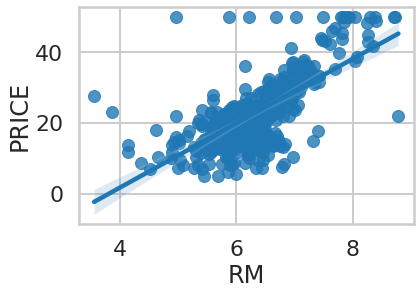

In [ ]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


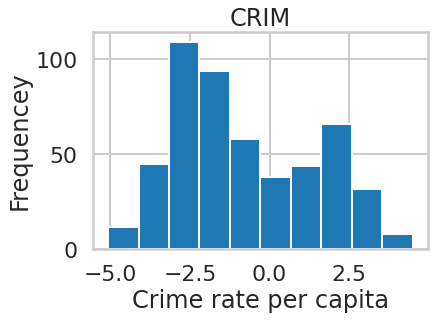

In [ ]:
# plt.hist(np.log(bos.CRIM), bins=int(np.sqrt(len(bos.CRIM))) )
plt.hist(np.log(bos.CRIM) )
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()


## <h3>Part 2 Checkup Exercise Set II</h3>



### <p><b>Question 4:</b> 
In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

**Answer:**
- When the original data has right skewed distribution, the transformations (e.g., log, square, etc) can transform the original data to new data that has normal distribution and remove outliers. This new data is easier to handle and very suitable for Machine Learning techniques applied afterward. 

- Compare two plots (before and after transformation), we see that the original data has right skew distribution while the new data has bimodal distribution that is easier to model. 

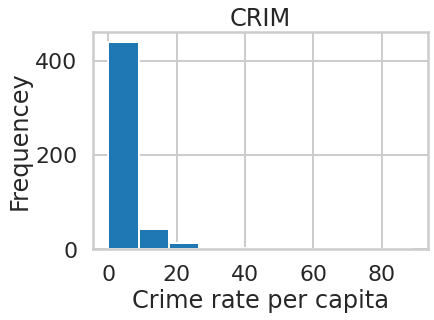

In [ ]:
# your turn
# plt.hist(bos.CRIM, bins=int(np.sqrt(len(bos.CRIM))) )
plt.hist(bos.CRIM )
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

### <p><b>Question 5:</b> 
Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>

**Answer:**


Text(0.5, 1.0, 'Relationship between RM and PTRATIO')

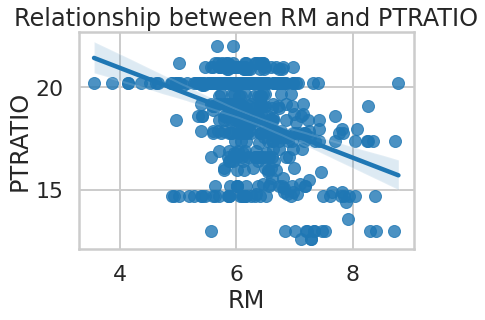

In [ ]:
## histogram for RM and PTRATIO against each other
sns.regplot(y="PTRATIO", x="RM", data=bos, fit_reg = True)
plt.title("Relationship between RM and PTRATIO")

Text(0.5, 1.0, 'Relationship between INDUS and NOX')

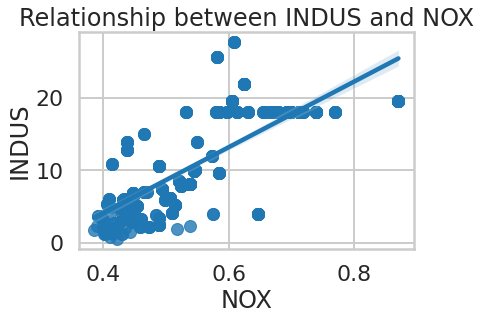

In [ ]:
## histogram for INDUS and NOX against each other
sns.regplot(y="INDUS", x="NOX", data=bos, fit_reg = True)
plt.title("Relationship between INDUS and NOX")

Text(0.5, 1.0, 'Relationship between AGE and NOX')

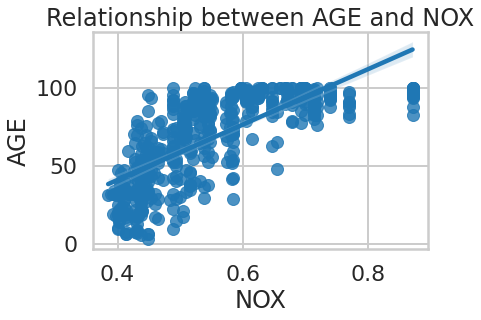

In [ ]:
## histogram for AGE and NOX against each other
sns.regplot(y="AGE", x="NOX", data=bos, fit_reg = True)
plt.title("Relationship between AGE and NOX")

Text(0.5, 1.0, 'Relationship between DIS and NOX')

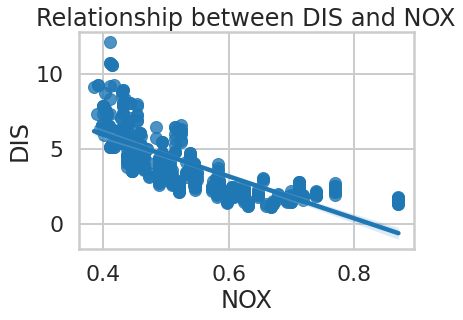

In [ ]:
## histogram for DIS and NOX against each other
sns.regplot(y="DIS", x="NOX", data=bos, fit_reg = True)
plt.title("Relationship between DIS and NOX")

# Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [ ]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.49e-74
Time:                        05:26:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 


## Part 3 Checkup Exercise Set I



### <p><b>Question 6:</b> 
Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>

**Answer:** 
- We plot the scatter results in the plot below. We also include the 1-1 correct prediction line (red line) in the plot. This line shows the correct prediction of the true price, i.e., it goes through points (0,0) and (50,50). 

- The ideal/perfect prediction model will provide all scatter points along this line, meaning that the predicted values are almost exact (or similar) as the true values. 

- From the plot, we see that most of scatter points are ''close'' to this line. However, overall the error is quite high for this OLS model: there are many points are far-off from this line. This is reflected in the R-squared value = 0.484 in the OLS results table above.

- Interestingly, the OLS model underpredicts the price when the true price is higher than 40. 

- Ceilling effect for true price around 50. 

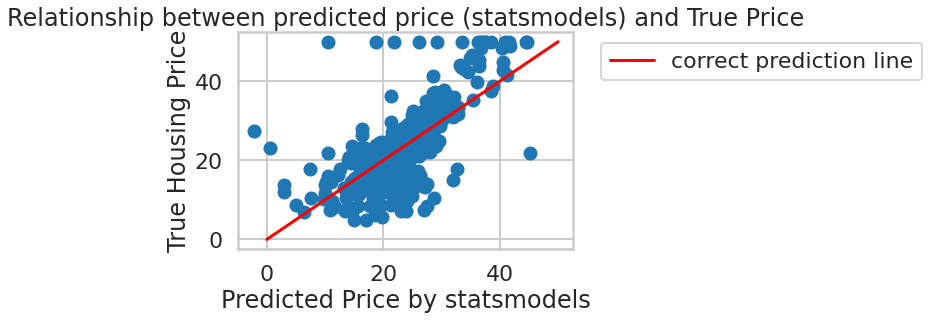

In [ ]:
# your turn: scatter plot between *m.fittedvalues* and *PRICE*
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price by statsmodels")
plt.ylabel("True Housing Price")
plt.title("Relationship between predicted price (statsmodels) and True Price")
plt.plot([0, 50], [0, 50], color='red', linewidth=3, label='correct prediction line')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### **Fitting Linear Regression using `sklearn`


In [ ]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
print(lm)

LinearRegression()


#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# print(lm.coef_)
# print(lm.intercept_)

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [ ]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()


## Part 3 Checkup Exercise Set II





### <p><b>Question 7:</b> 
How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

**Answer:** 

- Setting `fit_intercept = False` will force the intercept of LinearRegression model to be zero. (Hence, the model will go through origin.)

- As verified in the computation below, R-squared score with intercept model (0.7406) is higher than that of model without intercept (0.7137). Hence, for this particular problem, model with intercept is better than model without intercept. 

- In general, there is no universal rule to force intercept to be 0, this is problem-dependent. 

- For this particular Boston house price problem, considering all 13 features, when all features are zeros the house price is not necessary 0. This is very clear in question 1: in the plot of PRICE vs CRIM, when CRIM equal to 0 the PRICE is not necessarily 0. Or, when NOX or TAX are 0, the house prices may be even higher. 

In [ ]:
# We can set fit_intercept = False to NOT fit an intercept term. 
lm_no_intercept = LinearRegression(fit_intercept = False)
lm_no_intercept.fit(X, bos.PRICE)


LinearRegression(fit_intercept=False)

In [ ]:
## Compare R2 metric between these two scenarios:
print('R2 score with intercept', lm.score(X, bos.PRICE))
print('R2 score without the intercept',lm_no_intercept.score(X, bos.PRICE))


R2 score with intercept 0.7406426641094095
R2 score without the intercept 0.7137381380515405


### <p><b>Question 8:</b> 
One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

**Answer:** Generally, there are four assumptions made before conducting linear regression for a model (from [this](https://www.statology.org/linear-regression-assumptions/)): 

1. There exist linear relations between the independent variable $x$ and the dependent variable $y$. 

2. The residuals are i.i.d (i.e., independently and identically distributed).

3. The residuals are normally distributed.

4. The residuals have constant variance at every level of $x$ (i.e., homoscedasticity). 

Clearly, we can see that assumptions 2 and 3 are not related or they do not have any relation. They are two separate assumptions of a linear regression model, hence they have NO causal relation.  

### <p><b>Question 9:</b> 
True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.

**Answer:** Absolutely false. From the four assumptions in question 8 above, only residuals need to be normally distributed. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [ ]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508978


In [ ]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [ ]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


#### Comment: 
A small comment for the above table. From the table above, we can say that one unit increasing in NOX will decrease 17.76$\times$1000=\$17000 in house price. Similarly, one unit increasing in RM will increase 3.81$\times$1000 = \$3800 house price. 

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [ ]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])


## Part 3 Checkup Exercise Set III



### <p><b>Question 10:</b> 
Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

**Answer:** The histogram of all predicted prices are shown in the plot below. Several observations are as follow:

- Overall, the predicted prices by `sklearn` are very similar to that by `statsmodels` (see question 6). 

- The predicted prices seem to have normal distribution. The mean is 22.53, the variance is 62.64 and standard deviation is 7.91. The computed range is [-1.18, 46.25] that covers most of data points. There are still some few outliers (e.g., negative predicted price). 

- The negative predicted price is due to the linear regression model. We can remove these meaningless outliers from the calculation or plot. 

506


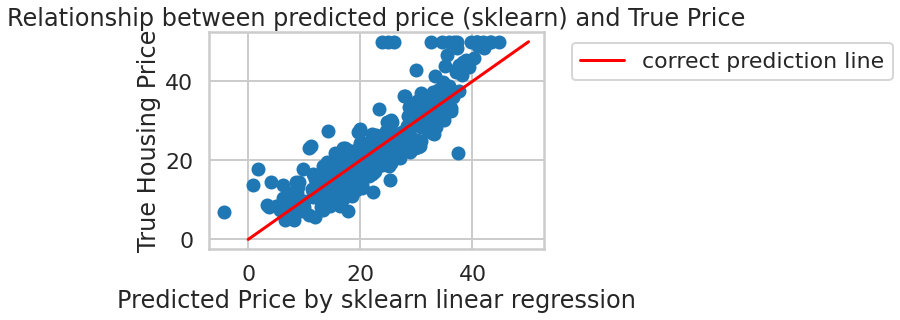

In [ ]:
# your turn: first let's see scatter plot of yhat vs ytrue
yhat = lm.predict(X)
print(len(yhat))

plt.scatter(yhat, bos.PRICE)
plt.xlabel("Predicted Price by sklearn linear regression")
plt.ylabel("True Housing Price")
plt.title("Relationship between predicted price (sklearn) and True Price")
plt.plot([0, 50], [0, 50], color='red', linewidth=3, label='correct prediction line')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

DescribeResult(nobs=506, minmax=(-4.281310709184886, 44.67308338731267), mean=22.53280632411068, variance=62.648536311018326, skewness=0.11071842432057807, kurtosis=0.10343116979617273)

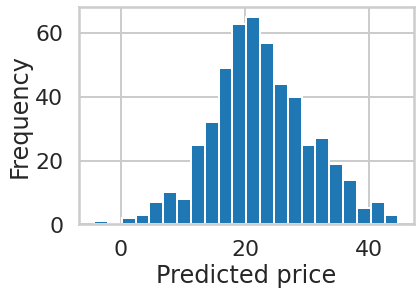

In [ ]:
## now histogram plot
# plt.hist(yhat, bins=20 )
plt.hist(yhat, bins=int(np.sqrt(len(yhat))) )
plt.xlabel('Predicted price')
plt.ylabel('Frequency')

from scipy import stats
stats.describe(yhat) 


In [ ]:
p_up  = np.mean(yhat) + 3 * np.std(yhat)
p_low = np.mean(yhat) - 3 * np.std(yhat)
print(np.mean(yhat))
print(np.std(yhat))
print('Range of predicted price: [' + str(p_low) +', '+str(p_up) +']' )
# print('Range of house price (consider outliers): [' + \
#       str(min(bos['PRICE'])) +', '+str(max(bos['PRICE'])) +']' )

22.53280632411068
7.90725774048344
Range of predicted price: [-1.1889668973396397, 46.254579545561]


### <p><b>Question 11:</b> 
Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

**Answer:** please see question 10 above.

### <p><b>Question 12:</b> 
We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>

**Answer:** Comparing question 6 and question 10 above, we see that `statsmodels` provide a lot more information than `sklearn` does. In particular, `statsmodels` provides with R-squared, Adj. R-squared, F-statistic, AIC, BIC, Omnibus, Durbin-Watson, Prob(Omnibus), Jarque-Bera (JB), Prob(JB), Condition Number. These types of information is not provided (by default) by `sklearn`. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_i x_i\right)\right)^2 $$

In [ ]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_i x_i \right) - \bar{y} \right)^2$$

In [ ]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837064252


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where **$N$ is the number of observations, $K$ is the number of variables**, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.


## Part 3 Checkup Exercise Set IV

<p>Let's look at the relationship between `PTRATIO` and housing price (question 2).</p>



### <p><b>Question 13:</b> 
Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

**Answer:** Please see the plot below. The slope (i.e., coefficient) is -2.15 means that one increasing unit of PTRATIO will decrease -2.15$\times$1000=\$-2150 in the house price. Also, the intercept is 62.34 meaning that when PTRATIO is 0, the house price is 62.34$\times$1000=\$62340 not considering other features. In general, PTRATIO and PRICE have negative correlation. 



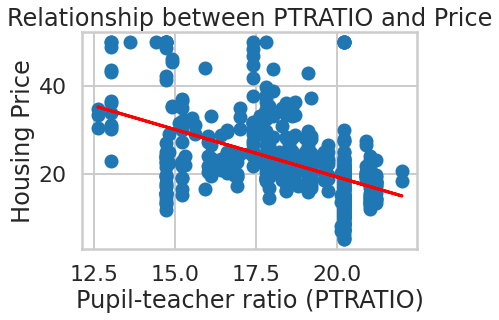

In [ ]:
## try to plot a linear regression fit to current plot
y = (bos.PRICE).values.reshape(-1,1)
x_ptratio = (bos.PTRATIO).values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x_ptratio, y)

plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.plot(bos.PTRATIO, reg.predict(x_ptratio), color='red', linewidth=3)
plt.show()

In [ ]:
reg.coef_, reg.intercept_

(array([[-2.1571753]]), array([62.34462747]))

### <p><b>Question 14:</b> 
Calculate (or extract) the $R^2$ value. What does it tell you?</p>

**Answer:** The value of $R^2$ is 0.2578 means that the feature PTRATIO explain only 25.8% the variance of house price. Other variables/features need to be considered to increase the accuracy of the linear regression model. 



In [ ]:
### manually computing R2
rss = np.sum((y - reg.predict(x_ptratio)) ** 2)
ess = np.sum((reg.predict(x_ptratio) - np.mean(y))**2)
r2  = ess / (ess+rss)
print('R2 (manual) = ', r2)

R2 (manual) =  0.25784731800922267


In [ ]:
### use built-in function 
reg.score(x_ptratio, y)

0.257847318009223

### <p><b>Question 15:</b> 
Compute the $F$-statistic. What does it tell you?</p>

**Answer:** Please see table below. The $F$-statistic value is 175.1 with p-value of 1.61e-34 (very close to 0) means that the null hypothesis that the coefficient $\beta$ for PTRATIO is zero can be rejected. That is, the coefficient $\beta$ is not zero; or in other words, the $\beta$ coefficient for PTRATIO has statistically significant effect on PRICE. 


In [ ]:
### manually compute
k = 1 # number of variables
n = len(x_ptratio)  # number of observations

msr = ess / k
mse = rss / (n-k-1)
f = msr / mse
print('F-statistic = ', f)

F-statistic =  175.10554287569516


In [ ]:
### use statsmodels
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.61e-34
Time:                        05:26:04   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

### <p><b>Question 16:</b> 
Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>

**Answer:** Generally, the $F$-statistic is equal to the square of the $t$-statistic. From the table, the $F$-statistic (175.1) has p-value of 1.61e-34 (very close to 0) and the $t$-statistic (-13.23) has p-value of 0.000. As p-values are very small compared to zero, this implies that the linear regression model is statistically significant. 


## Part 3 Checkup Exercise Set V

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>



In [ ]:
m = ols('PRICE ~ CRIM+RM+PTRATIO', bos).fit()
print(m.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           6.15e-98
Time:                        05:26:04   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

### <p><b>Question 17:</b> 
Compute or extract the $F$-statistic. What does it tell you about the model?</p>

**Answer:** From the table above, the $F$-statistic is 245.2 with p-value of 6.15e-98 (basically 0) implies the null hypothesis that the coefficients of three variables CRIM, RM and PTRATIO are zero is rejected. Namely, at least one of the coefficients is not zero. 



### <p><b>Question 18:</b> 
Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

**Answer:** The value for $R^2$ is 0.594. This implies that 59.4% of the variance in the house price is explained by the model 'CRIM+RM+PTRATIO'. This $R^2$ value (0.594) is better than that of the model 'PTRATIO' alone (0.258) in question 14. 

### <p><b>Question 19:</b> 
Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>

**Answer:** 
- Note that the p-values for all three variables are very small compared to 0, hence they are statistically significant in predicting PRICE. 

- Among the three variables CRIM, RM and PTRATIO, the RM variable is most significant in predicting PRICE as one increasing unit in RM will increase \$7380 in PRICE (slope 7.38 in the table). 

- The next significant variable is PTRATIO (slope -1.069) as one increasing unit in PTRATIO will decrease \$1070 in PRICE.

- The last significant variable is CRIM (slope -0.205) as one increasing unit in CRIM will decrease \$205 in PRICE.

- Finally, the intercept (-3.3707) has big p-value of 0.404 meaning that it is not statistically significant and hence it can be set safely to 0. 

# Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

## <h3>Part 4 Checkup Exercises</h3>



### <p><b>Question 20:</b> 
Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>

**Answer:** 
- From the heat map plot in question 3, we see that the correlation coefficients of LSTAT (-0.74), INDUS (-0.48), NOX (-0.43) and TAX (-0.47) with respect to PRICE are high. Hence adding any of these variables to the ML model will increase the accuracy of the model. 

- We include LSTAT and INDUS variables into the model (CRIM+RM+PTRATIO) in question 17. 

- The results are shown below. Comparing the table below with the table in question 17: 
  
  + Current table: $R^2$=0.682; F-statistic=214.1; Prob (F-statistic)=8.89e-122; AIC=3113

  + Table (question 17): $R^2$=0.594; F-statistic=245.2; Prob (F-statistic)=6.15e-98; AIC=3232

- Comparing with the model in question 17, the current model increase $R^2$ by almost 13%, brings p-value closer to 0 and decreasing AIC by almost 4%. These imply that this current model fits data better than the model in question 17 does. 

In [ ]:
## we include LSTAT, INDUS and TAX to the model in question 17 (part 3)
m = ols('PRICE ~ CRIM+RM+PTRATIO + LSTAT+INDUS', bos).fit()
print(m.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          8.89e-122
Time:                        05:26:04   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0028      3.981      4.271      0.0


# Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>



## Part 5 Checkup Exercises

Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.
    


### <p><b>Question 21:</b> 
Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

**Answer:** Please see the results below. Some observations:

- Most of the residual points lie within $y \in [-10,10]$ which is good. 

- There are some high residuals above $y \ge 20$, these are probably outliers. 

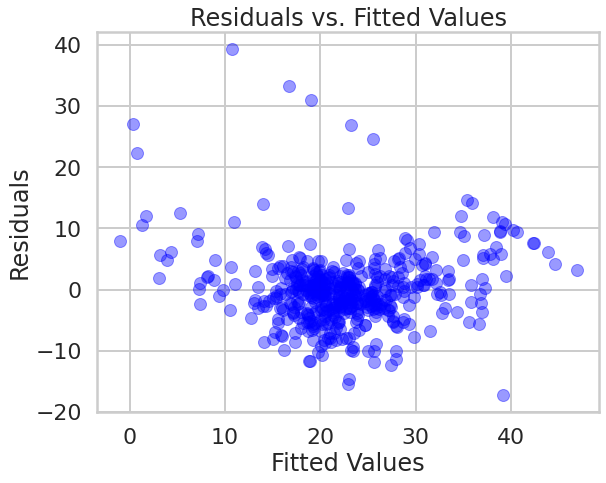

In [ ]:
## retrieve model in part 3, question 17 
fitted = ols('PRICE ~ CRIM+RM+PTRATIO', bos).fit()

### better visualization -- Scatter Residual vs. Fitted
plt.figure(figsize=(9,7))
plt.plot(fitted.fittedvalues, fitted.resid, marker='o', linestyle='none', color='blue', alpha=0.4)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# plt.figure(figsize=(20,20))
# sns.jointplot(fitted.fittedvalues, fitted.resid, kind="scatter").set_axis_labels('Fitted Values','Residuals')
# plt.show()


### <p><b>Question 22:</b> 
Construct a quantile plot of the residuals. What does the plot tell you?</p>

**Answer:** Please see the plot below.

- We can see most of the residual points fall along the straight line. This is a strong evidence that the computed residuals have normal distribution.

- However, the most right points are off the line meaning that there are more extreme values than expected if they truly come from a normal distribution. 

- We verify this observation by plotting the distribution of residuals. We obseve a long right tail that agrees with observation above. 


<Figure size 720x576 with 0 Axes>

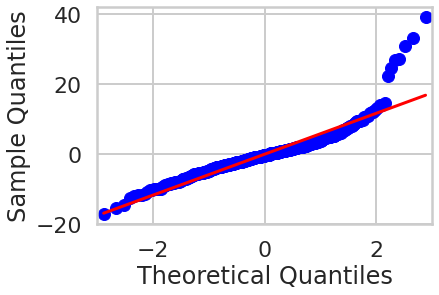

In [ ]:
plt.figure(figsize=(10,8))
sm.qqplot(fitted.resid, line='s')
plt.show()

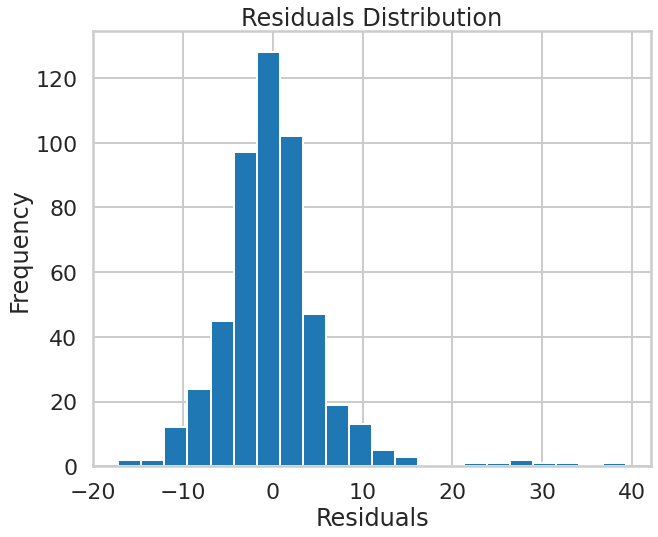

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(fitted.resid, bins=int(np.sqrt(len(fitted.resid))))
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

### <p><b>Question 23:</b> 
What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

**Answer:** 

- The advantage of the fitted vs. residual plot is that it shows the dispersion of residuals with respect to fitted values. Hence, it can capture any intrinsic trend of this dispersion. Also, it allows easy visualization of any outliers. 

- The advantange of the quantile plot is that it visualizes clearly the distribution of residuals with respect to normal distribution. It is great at regconizing whether residual distribution is normal distribution. 

- Depending on the specific purpose, we can use/combine both plots to provide a full summary statistics of the residuals. 

### <p><b>Question 24:</b> 
Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

**Answer:** Please table below. 

- From the table, we see that the outliers have the same values for ZN, INDUS, RAD, TAX, PTRATIO variables and the values are high (i.e., 75% percentiles). The values for other variables such as CRIM, NOX, AGE are also very high. 

- The true PRICE for these outliers are mostly 50 which also are outliers (see questions 1, 2). As a result, the linear regression model has difficulty to learn and map these outliers. 

- This trend seems NOT reasonable as house prices should be cheap with high values of the above variables. 

In [ ]:
## identify outliers
fit_up  = np.mean(fitted.resid) + 3 * np.std(fitted.resid)
fit_low = np.mean(fitted.resid) - 3 * np.std(fitted.resid)
print(np.mean(fitted.resid))
print(np.std(fitted.resid))
print('Range of residuals: [' + str(fit_low) +', '+str(fit_up) +']' )

-1.7833780126785124e-14
5.851967866051294
Range of residuals: [-17.5559035981539, 17.555903598153865]


In [ ]:
# fitted[(fitted.resid > fit_up) | (fitted.resid < fit_low)]
outlier = bos[(fitted.resid > fit_up) | (fitted.resid < fit_low)]
print(outlier)

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
365   4.55587  0.0   18.1   0.0  0.718  3.561   87.9  1.6132  24.0  666.0   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
368   4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369   5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  PRICE  
365     20.2  354.70   7.12   27.5  
367     20.2  131.42  13.33   23.1  
368     20.2  375.52   3.26   50.0  
369     20.2  375.33   3.73   50.0  
370     20.2  392.05   2.96   50.0  
371     20.2  366.15   9.53   50.0  
372     20.2  347.88   8.88   50.0  


In [ ]:
## compare with summary statistics
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### <p><b>Question 25:</b> 
Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

**Answer:** Please see the plot below. 
- From the plot, we see that the points indexed 380, 418, 405, 410 and 414 have high leverage. 

- Looking at these data points reveal similar trends to that in question 24 above: very high values in CRIM, INDUS, AGE, RAD, TAX, PTRATIO but resulting low PRICE. This seems reasonable as cheaper house prices might have high values of the above features. 

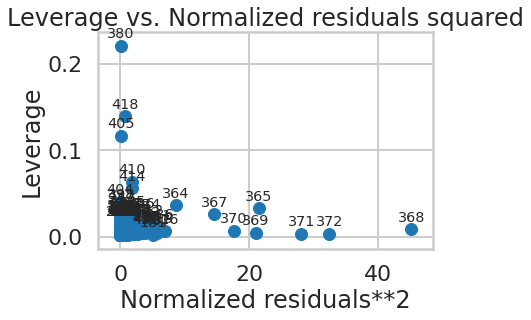

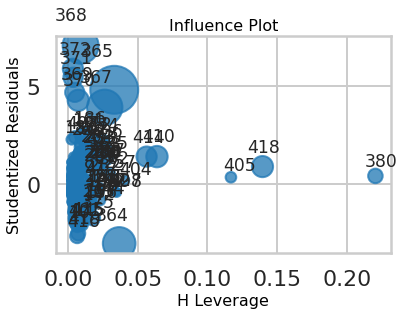

In [ ]:
from statsmodels.graphics.regressionplots import *
plt.rc("font", size=12)
fig1 = plot_leverage_resid2(fitted)
fig2 = influence_plot(fitted)


In [ ]:
high_lev_ind = [380,405,410,414,418]
high_lev = bos.iloc[high_lev_ind, :]
print(high_lev)

## compare with summary statistics
bos.describe()


        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
380  88.9762  0.0   18.1   0.0  0.671  6.968   91.9  1.4165  24.0  666.0   
405  67.9208  0.0   18.1   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   
410  51.1358  0.0   18.1   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
414  45.7461  0.0   18.1   0.0  0.693  4.519  100.0  1.6582  24.0  666.0   
418  73.5341  0.0   18.1   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   

     PTRATIO       B  LSTAT  PRICE  
380     20.2  396.90  17.21   10.4  
405     20.2  384.97  22.98    5.0  
410     20.2    2.60  10.11   15.0  
414     20.2   88.27  36.98    7.0  
418     20.2   16.45  20.62    8.8  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
print(fitted.resid[high_lev_ind])

380    2.185467
405    1.953763
410    7.967345
414    7.999617
418    4.882037
dtype: float64


### <p><b>Question 26:</b> 
Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>

**Answer:** Please see plots below. Comparing with the results in questions 17, 21, 22, we see a significant improvement:

- $R^2$ score increases from 0.594 (question 17) to 0.723; AIC score decreases from 3232 (question 17) to 2921. 

- residual vs fitted values plot: the value ranges for residual (y-axis) now shrinks to [-15,15] from [-15, 40] (question 21). 

- distribution plot: quantile plot also shows much better agreement compared with plot in question 22. 

In [ ]:
# Your turn.
outlier_ind = [365,367,368,369,370,371,372]
ind_remove  = high_lev_ind + outlier_ind
print(ind_remove)

[380, 405, 410, 414, 418, 365, 367, 368, 369, 370, 371, 372]


In [ ]:
bos_no_outlier = bos.drop(index=ind_remove)

In [ ]:
# Run the linear regression fitting for bos_no_out
m26 = ols('PRICE ~ CRIM + RM + PTRATIO', bos_no_outlier).fit()
print(m26.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     426.4
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          3.64e-136
Time:                        05:26:07   Log-Likelihood:                -1456.3
No. Observations:                 494   AIC:                             2921.
Df Residuals:                     490   BIC:                             2937.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8011      3.259     -2.087      0.0

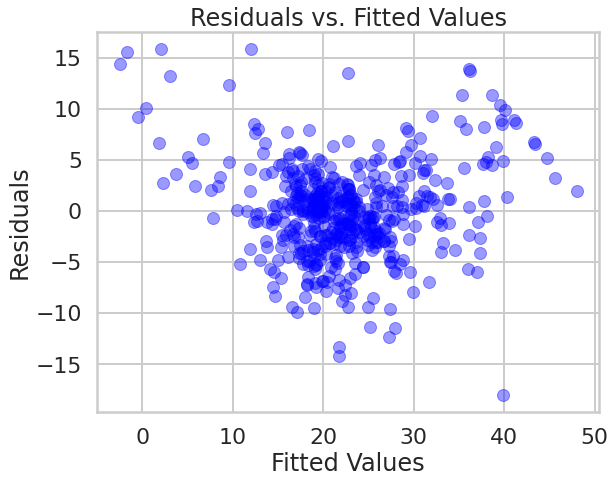

In [ ]:
### Scatter Residual vs. Fitted
plt.figure(figsize=(9,7))
plt.plot(m26.fittedvalues, m26.resid, marker='o', linestyle='none', color='blue', alpha=0.4)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

<Figure size 720x576 with 0 Axes>

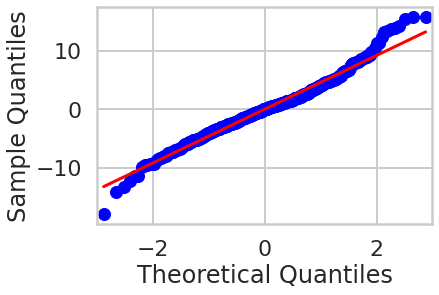

In [ ]:
### quantile plot ###
plt.figure(figsize=(10,8))
sm.qqplot(m26.resid, line='s')
plt.show()

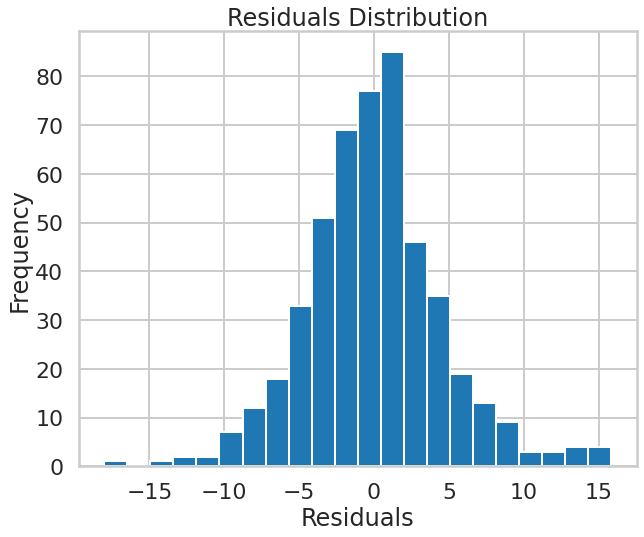

In [ ]:
### distribution of residuals ###
plt.figure(figsize=(10,8))
plt.hist(m26.resid, bins=int(np.sqrt(len(m26.resid))))
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()